## Task 44 - Supervised learning IV: Decision Trees I

#### Hemant Thapa

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import polars as pl

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz

from IPython.display import Image  
from subprocess import call
import warnings
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [3]:
df = pd.read_csv('Titanic.csv')
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleansing

#### Checking Row and columns

In [4]:
df.shape

(891, 12)

#### Checking data types

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Checking Unique Columns and converting into lowercase

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.columns=df.columns.str.lower()
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

#### Checking null values

In [8]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

<font color='blue'>There are 177 null values in age, 687 null values in cabin, and 2 null values in embarked

#### Missing count

In [9]:
missing_values_count = df.isnull().sum().sum()
missing_values_count

866

In [10]:
total_cells = np.product(df.shape)
total_cells

10692

In [11]:
print(f'Total Missing Values in dataset: {round(missing_values_count/total_cells*100,4)}%')

Total Missing Values in dataset: 8.0995%


#### Checking unique null values in dataset

In [12]:
df.columns[df.isna().any()]

Index(['age', 'cabin', 'embarked'], dtype='object')

####  <font color='blue'>1. Treating age null values

In [13]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [15]:
#Easiest way to treat nan value in age is though imputation of mean value
mean_value_age = df.age.mean()
mean_value_age

29.69911764705882

In [16]:
df.age = df.age.replace(np.nan,mean_value_age)
df.age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

#### <font color='blue'>2. Treating cabin null values

In [17]:
df.columns[df.isna().any()]

Index(['cabin', 'embarked'], dtype='object')

In [18]:
df.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
#We have removed cabin columns and there is no logical reason to replace each specific values
#Inserting wrong value can cause error in predictions
df.drop('cabin',axis=1, inplace=True)
df[:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### <font color='blue'> 3.Treating Embarked null values

In [20]:
df.columns[df.isna().any()]

Index(['embarked'], dtype='object')

In [21]:
#Unique columns
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
#Missing unique row and columns
df[df.isna().any(axis=1)]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


#### After analysing embarked missing rows, we have realised common thing between them are survival and pclass1, their fare price is also high and both are female

In [23]:
#Iterating through dataframe and taking out all the passenger with pclass1
mask = (df['pclass'] == 1)
result = df[mask]
result[0:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [24]:
result.shape

(216, 11)

#### Now we have common data, which have same pclass1

In [25]:
#Grouping according to embarked S,C & Q
counts = result['embarked'].value_counts()
counts

S    127
C     85
Q      2
Name: embarked, dtype: int64

#### Pclass1 has nearly S:127, C:85, and Q:2

In [26]:
#Let say, we have data. where fare were above 80 and less than 100
#We have shrink those above pclass1 dataframe scale to price between 80-100
mask = (df['fare'] >= 80) & (df['fare'] <= 100)
result2 = df[mask]
result2

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.000000,1,0,19943,90.0000,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.000000,1,0,36973,83.4750,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.000000,2,0,19928,90.0000,Q
257,258,1,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.5000,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.000000,0,0,11767,83.1583,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,C


In [27]:
result2['sex'].value_counts()

female    16
male       7
Name: sex, dtype: int64

In [28]:
female_count = (result2['sex'] == 'female')
female_count = result2[female_count]
female_count

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,NaN
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.000000,1,0,36973,83.4750,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.5000,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.000000,0,0,11767,83.1583,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,C
412,413,1,1,"Minahan, Miss. Daisy E",female,33.000000,1,0,19928,90.0000,Q
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.000000,1,0,19943,90.0000,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.000000,0,0,110152,86.5000,S
520,521,1,1,"Perreault, Miss. Anne",female,30.000000,0,0,12749,93.5000,S


In [29]:
emabarked_female_count = female_count['embarked'].value_counts()
emabarked_female_count

S    7
C    6
Q    1
Name: embarked, dtype: int64

#### While observing and our analogy says, dataset above, S still has highest and C is second lowest and Q is the lowest. 
where, S:7, C:6, & Q:1 

In [30]:
#Replacing nan values with S
df.embarked = df.embarked.replace(np.nan, 'S')
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
#Checking nan value again
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

### Data manipulation

#### Converting gender into binary digit

In [32]:
df.sex = df.sex.replace('female',0)

In [33]:
df.sex = df.sex.replace('male',1)

In [34]:
df.sex = df.sex.astype('category')

In [35]:
df.sex.unique()

[1, 0]
Categories (2, int64): [0, 1]

Checking male and female in binary digit

In [36]:
gender_count = df.sex.value_counts()
gender_count 

1    577
0    314
Name: sex, dtype: int64

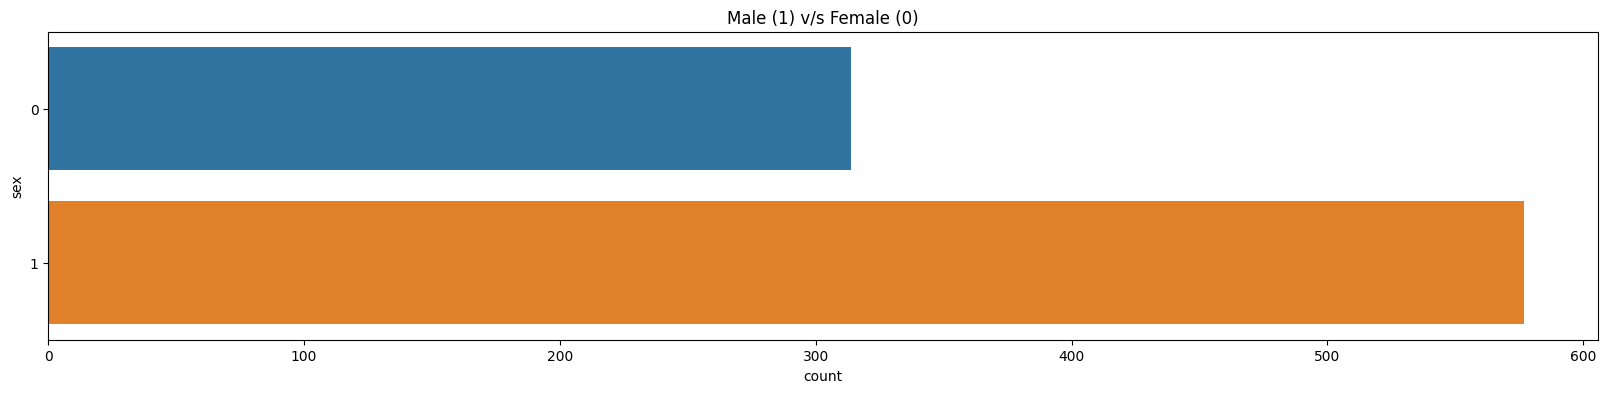

In [37]:
fig = plt.figure(figsize=(20,4))
ax = sns.countplot(y='sex', data=df)
plt.title('Male (1) v/s Female (0)')
plt.show()

#### Converting embarked columns into three different digits

In [38]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [39]:
df.embarked = df.embarked.replace('S',0)

In [40]:
df.embarked = df.embarked.replace('C',1)

In [41]:
df.embarked = df.embarked.replace('Q',2)

In [42]:
df.embarked = df.embarked.astype('category')

In [43]:
df.embarked.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

Checking Embarked in binary digit

In [44]:
df.embarked.value_counts()

0    646
1    168
2     77
Name: embarked, dtype: int64

#### Cheking row and columns 

In [45]:
df.shape

(891, 11)

#### Checking data types

In [46]:
df.dtypes

passengerid       int64
survived          int64
pclass            int64
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked       category
dtype: object

## Machine Learning 

Defining Dependent and Independent Variables

In [47]:
df[:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [48]:
df['age'] = df['age'].astype(int)

In [49]:
# Select relevant variables
x = df[['age', 'fare', 'pclass', 'sex', 'survived']]

In [50]:
# Convert categorical variables 'Sex' to numerical values
x['sex'] = x['sex'].apply(lambda x: 0 if x == 'male' else 1)

In [51]:
# Split the data into training, development, and test sets
y = x['survived']
x = x.drop(['survived'], axis=1)

In [52]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [53]:
x[:5]

,age,fare,pclass,sex
0,22,7.2500,3,1
1,38,71.2833,1,1
2,26,7.9250,3,1
3,35,53.1000,1,1
4,35,8.0500,3,1


In [54]:
print(f'shape of Independent variable: {x.shape}')
print(f'shape of Dependent variable: {y.shape}')

shape of Independent variable: (891, 4)
shape of Dependent variable: (891,)


## TRAIN, TEST AND SPLIT

The independent variables and dependent variable respectively. train_size argument is set to 0.8, meaning 80% of the data will be used for training and 20% for testing. The shuffle argument is set to True, meaning the data will be shuffled randomly before splitting into training and testing sets.

In [55]:
r = 4#random state

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=r)

In [57]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(x_train, y_train)
print("Performance without pruning:", unpruned.score(x_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7318435754189944
At depth: 22


In [58]:
md = 22 #Max_depthß

In [59]:
# Train a decision tree classifier with default parameters
clf_model = DecisionTreeClassifier(max_depth=md, random_state=r)

In [60]:
clf_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=22, random_state=4)

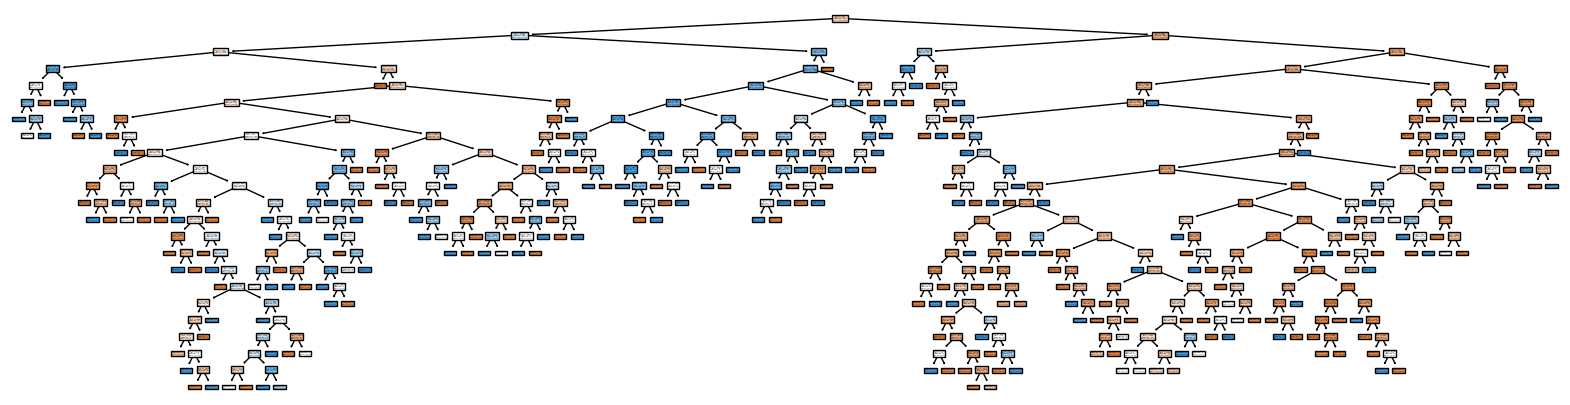

In [61]:
# Plot the decision tree
plt.figure(figsize=(20,5))
tree.plot_tree(clf_model, filled=True)
plt.show()

In [62]:
#Train Test and Split for development set
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=4)

In [63]:
# Compute accuracy on the development set
acc_dev = clf_model.score(x_dev, y_dev)
print("Accuracy on the development set: ", acc_dev)

Accuracy on the development set:  0.9300699300699301


The accuracy of the model is computed on this set after each iteration of the loop, where the model is trained with different values of max_depth. The score method of the clf object is used to compute the accuracy, which is stored in the dev_accuracies list.

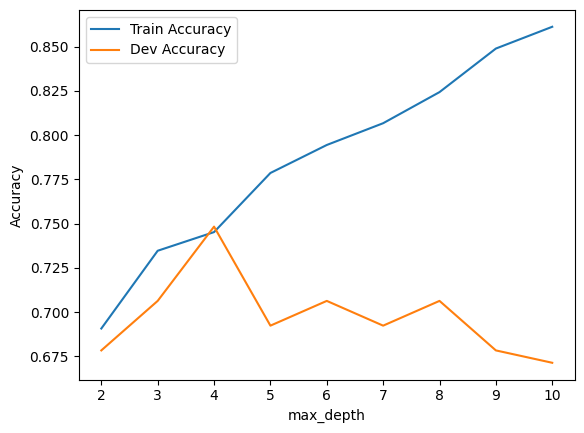

In [64]:
# Plot line of training and development accuracies for different values of max_depth
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
train_accuracies = []
dev_accuracies = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(x_train, y_train)
    train_accuracies.append(clf.score(x_train, y_train))
    dev_accuracies.append(clf.score(x_dev, y_dev))
    
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, dev_accuracies, label='Dev Accuracy')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

The line plot is created with max_depths on the x-axis and dev_accuracies on the y-axis. The aim of this plot is to find the optimum value of max_depth that gives the highest accuracy on the validation set.

In [65]:
# Choose optimum max_depth based on the line plot and train the final decision tree
optimum_max_depth = max_depths[np.argmax(dev_accuracies)]
clf_model = DecisionTreeClassifier(max_depth=optimum_max_depth)
clf_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

The optimum value of max_depth is chosen based on the highest accuracy on the validation set, and the final model is trained using this value. 

The accuracy of the final model on the test set (x_test and y_test) is reported at the end.

In [66]:
# Report accuracy on the test set
acc_test = clf_model.score(x_test, y_test)
print(acc_test)

0.7318435754189944


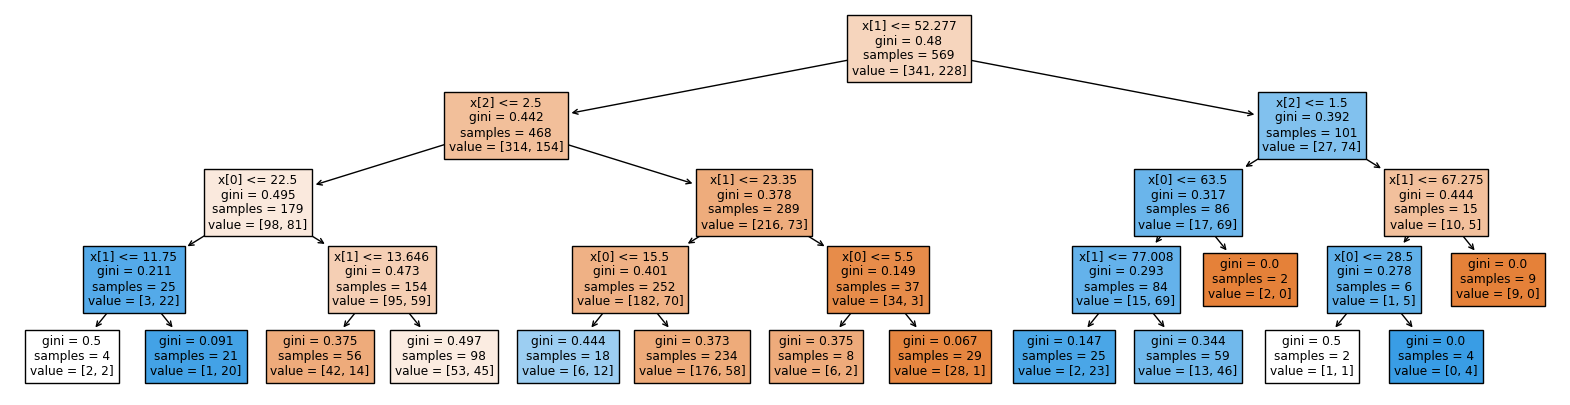

In [67]:
# Plot the decision tree
plt.figure(figsize=(20,5))
tree.plot_tree(clf_model, filled=True)
plt.show()